<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/notebook_2024/Lab06_least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least Squares Approximation
- 측정데이터 (t,b)에 대한 1차 함수 b = C + Dt 를 least squares approximation을 통하여 구해보는 실습입니다.
- 우리는 projection을 통해 least squares error를 최소로 만들어 주는 (C, D)를 구할 수가 있습니다.
- 주어진 데이터쌍 (t,b)로부터 linear equation Ax = b 를 구성하고, least squares error를 최소로 만드는 vector p 를 만들어주는 x를 구합니다.







In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- 실습에 사용하기 위한 csv파일을 불러와서 data를 관찰합니다.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hufsbme/T03108701/master/ch4/headbrain.csv')

In [3]:
strd=5
data[::strd]

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
5,1,1,3585,1300
10,1,1,3443,1340
15,1,1,3876,1405
20,1,1,3878,1357
25,1,1,4423,1505
30,1,1,3787,1318
35,1,1,3814,1207
40,1,1,3962,1350
45,1,1,4034,1422


- t, b에 data의 column을 입력하고, plot을 하여 t와 b의 관계를 관찰합니다.

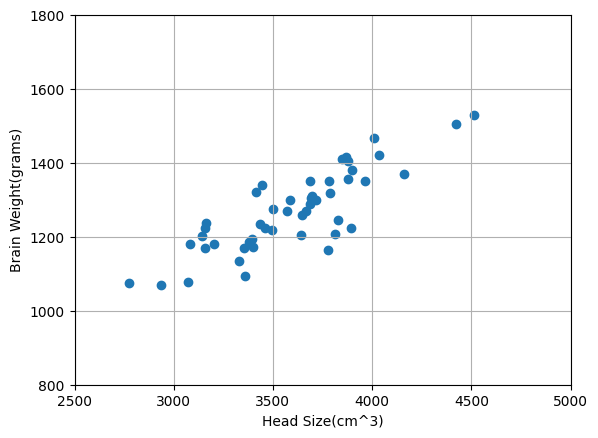

In [4]:
t = data.iloc[::strd,2]
b = data.iloc[::strd,3]
plt.scatter(t,b)
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.xlim([2500,5000])
plt.ylim([800,1800])
plt.grid(True)
plt.show()

- b vector의 shape을 확인합니다.

In [5]:
b=np.array(b)
b=b.reshape((len(b),1))
print(b.shape)

(48, 1)


- matrix A를 정의합니다. A의 첫 번째 column은 모두 1이 되게 하고, 두 번째 column은 t를 넣도록 합니다.
- A의 shape을 확인해 봅니다.

In [6]:
A = np.ones([len(b),2])
A[:,1] = t
print(A.shape)

(48, 2)


- Matrix A가 제대로 구성되었는지 확인해봅니다.

In [7]:
print('A=')
print(A)

A=
[[1.000e+00 4.512e+03]
 [1.000e+00 3.585e+03]
 [1.000e+00 3.443e+03]
 [1.000e+00 3.876e+03]
 [1.000e+00 3.878e+03]
 [1.000e+00 4.423e+03]
 [1.000e+00 3.787e+03]
 [1.000e+00 3.814e+03]
 [1.000e+00 3.962e+03]
 [1.000e+00 4.034e+03]
 [1.000e+00 3.891e+03]
 [1.000e+00 3.458e+03]
 [1.000e+00 3.866e+03]
 [1.000e+00 3.329e+03]
 [1.000e+00 4.008e+03]
 [1.000e+00 3.394e+03]
 [1.000e+00 3.830e+03]
 [1.000e+00 3.850e+03]
 [1.000e+00 4.160e+03]
 [1.000e+00 3.779e+03]
 [1.000e+00 3.495e+03]
 [1.000e+00 3.648e+03]
 [1.000e+00 3.695e+03]
 [1.000e+00 3.499e+03]
 [1.000e+00 3.399e+03]
 [1.000e+00 3.782e+03]
 [1.000e+00 3.666e+03]
 [1.000e+00 3.436e+03]
 [1.000e+00 3.572e+03]
 [1.000e+00 3.899e+03]
 [1.000e+00 3.413e+03]
 [1.000e+00 3.156e+03]
 [1.000e+00 3.071e+03]
 [1.000e+00 3.082e+03]
 [1.000e+00 3.145e+03]
 [1.000e+00 3.203e+03]
 [1.000e+00 3.689e+03]
 [1.000e+00 3.642e+03]
 [1.000e+00 3.165e+03]
 [1.000e+00 2.773e+03]
 [1.000e+00 3.360e+03]
 [1.000e+00 3.692e+03]
 [1.000e+00 2.937e+03]
 [1.000e

- Vector b가 제대로 구성되었는지 확인해 봅니다.

In [8]:
print('b=')
print(b)

b=
[[1530]
 [1300]
 [1340]
 [1405]
 [1357]
 [1505]
 [1318]
 [1207]
 [1350]
 [1422]
 [1224]
 [1225]
 [1415]
 [1135]
 [1468]
 [1195]
 [1245]
 [1412]
 [1370]
 [1165]
 [1218]
 [1260]
 [1310]
 [1275]
 [1173]
 [1350]
 [1270]
 [1235]
 [1270]
 [1380]
 [1322]
 [1170]
 [1078]
 [1180]
 [1202]
 [1180]
 [1290]
 [1205]
 [1237]
 [1076]
 [1095]
 [1305]
 [1070]
 [1225]
 [1185]
 [1300]
 [1350]
 [1170]]


- matrix A의 transpose matrix를 계산합니다.

In [9]:
AT = A.transpose()
AT.shape

(2, 48)

- matrix A의 transpose와 matrix A를 곱한 결과를 ATA로 정의합니다.

In [10]:
ATA = np.matmul(AT,A)
print('shape of ATA:',ATA.shape)
print('ATA=')
print(ATA)

shape of ATA: (2, 2)
ATA=
[[4.8000000e+01 1.7258800e+05]
 [1.7258800e+05 6.2664833e+08]]


- ATA의 inverse matrix를 구합니다.

In [11]:
ATA_inv = np.linalg.inv(ATA)
print('ATA_inv=')
print(ATA)

ATA_inv=
[[4.8000000e+01 1.7258800e+05]
 [1.7258800e+05 6.2664833e+08]]


- inverse matrix의 정의를 통하여 inverse matrix가 제대로 구하여졌는지 확인해 봅니다.
- Nondiagonal element들이 정확히 0이 되지 않는 이유는?

In [12]:
print(np.matmul(ATA,ATA_inv))

[[ 1.00000000e+00 -1.91323567e-18]
 [-3.04356644e-11  1.00000000e+00]]


In [13]:
print(np.matmul(ATA_inv,ATA))

[[ 1.00000000e+00 -3.04356644e-11]
 [-1.91323567e-18  1.00000000e+00]]


- least squares error를 최소로 만들어주는 x를 구합니다.

In [14]:
x = np.matmul(ATA_inv, np.matmul(AT,b))
print(x)

[[3.50801733e+02]
 [2.55698640e-01]]


- b = C + Dt 의 C를 x로부터 얻어낼 수 있습니다.

In [15]:
C = x[0]
D = x[1]
print('C=',C)
print('D=',D)

C= [350.80173343]
D= [0.25569864]


- Projection vector p는 x에 A를 곱하여 얻을 수 있습니다.
- Error vector는 b에서 p를 빼주어 구합니다.

In [16]:
p = np.matmul(A,x)
e = b - p
print(e)

[[  25.48600511]
 [  32.51864393]
 [ 108.82785074]
 [  63.11033984]
 [  14.59894256]
 [  23.24318403]
 [  -1.13248125]
 [-119.03634451]
 [ -13.87974316]
 [  39.7099548 ]
 [-121.72513975]
 [ -10.00762885]
 [  75.66732623]
 [ -67.02250435]
 [  92.35811942]
 [ -23.64291592]
 [ -85.12752274]
 [  76.75850447]
 [ -44.50807378]
 [-152.08689213]
 [ -26.46847851]
 [ -23.59037035]
 [  14.39179359]
 [  29.50872693]
 [ -46.92140912]
 [  32.14601195]
 [ -18.19294587]
 [   5.61774122]
 [   5.84272625]
 [  32.22927113]
 [  98.49880993]
 [  12.21336028]
 [ -58.05225536]
 [  41.13505961]
 [  47.02604532]
 [  10.19552423]
 [  -4.07401457]
 [ -77.05617852]
 [  76.91207253]
 [  16.14593921]
 [-114.94916218]
 [  10.15888951]
 [ -31.78863767]
 [  67.21336028]
 [ -30.31883361]
 [  -0.97787784]
 [  56.94877998]
 [ -37.90357306]]


- Projection vector를 plot하여 data를 잘 표현하는 1차함수가 만들어졌는지 확인해봅니다.

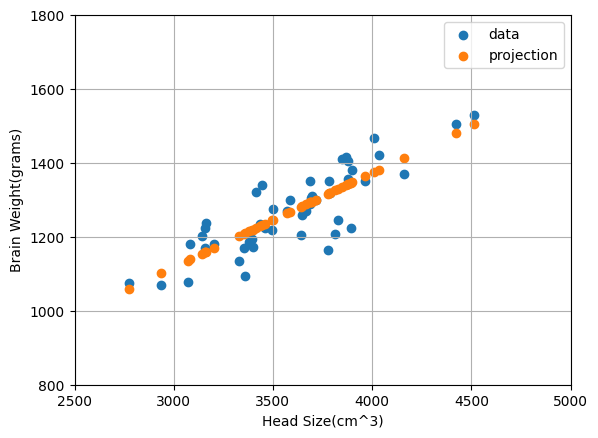

In [17]:
plt.scatter(t,b)
plt.scatter(t,p)
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.xlim([2500,5000])
plt.ylim([800,1800])
plt.grid(True)
plt.legend(['data','projection'])
plt.show()

- Error vector를 plot하여 각각의 data에 대한 error의 정도를 확인해 볼 수 있습니다.

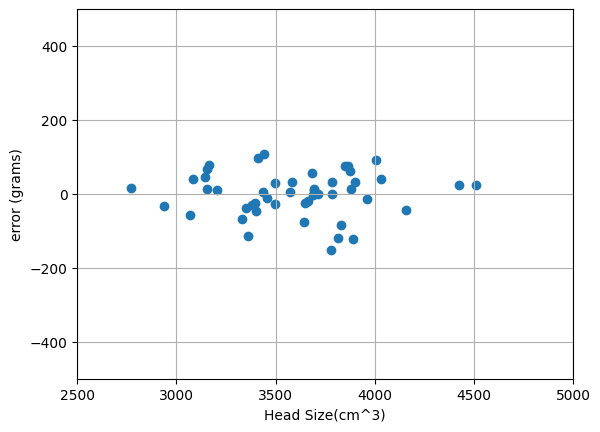

In [18]:
plt.scatter(t,e)
plt.xlabel(data.columns[2])
plt.ylabel('error (grams)')
plt.xlim([2500,5000])
plt.ylim([-500,500])
plt.grid(True)
plt.show()

- 지금까지의 과정을 numpy에서 제공하는 lstsq함수를 이용해 한 번에 구해볼 수도 있습니다.

In [19]:
x =np.linalg.lstsq(A,b) # least squares solution
C = x[0][0]
D = x[0][1]
print('C=',C)
print('D=',D)

C= [350.80173343]
D= [0.25569864]


<ipython-input-19-a5f2c1e8afed>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x =np.linalg.lstsq(A,b) # least squares solution
